In [23]:
import pandas as pd # type: ignore
import numpy as np # type: ignore

from sklearn.model_selection import train_test_split # type: ignore
from sklearn.preprocessing import StandardScaler, LabelEncoder # type: ignore
from sklearn.linear_model import LinearRegression # type: ignore
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score # type: ignore
from sklearn.metrics import root_mean_squared_error

In [24]:
df = pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [25]:
drop_col = ['stories', 'mainroad', 'parking', 'prefarea']

df = df.drop(drop_col, axis=1)
df.head()

,price,area,bedrooms,bathrooms,guestroom,basement,hotwaterheating,airconditioning,furnishingstatus
0,13300000,7420,4,2,no,no,no,yes,furnished
1,12250000,8960,4,4,no,no,no,yes,furnished
2,12250000,9960,3,2,no,yes,no,no,semi-furnished
3,12215000,7500,4,2,no,yes,no,yes,furnished
4,11410000,7420,4,1,yes,yes,no,yes,furnished


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   guestroom         545 non-null    object
 5   basement          545 non-null    object
 6   hotwaterheating   545 non-null    object
 7   airconditioning   545 non-null    object
 8   furnishingstatus  545 non-null    object
dtypes: int64(4), object(5)
memory usage: 38.4+ KB


In [27]:
df.describe()

,price,area,bedrooms,bathrooms
count,5.450000e+02,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239
std,1.870440e+06,2170.141023,0.738064,0.502470
min,1.750000e+06,1650.000000,1.000000,1.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000
max,1.330000e+07,16200.000000,6.000000,4.000000


In [28]:
cats = [i for i in df.columns if df[i].dtypes == 'object']

df[cats].describe()

,guestroom,basement,hotwaterheating,airconditioning,furnishingstatus
count,545,545,545,545,545
unique,2,2,2,2,3
top,no,no,no,no,semi-furnished
freq,448,354,520,373,227


In [29]:
df['furnishingstatus'].value_counts()

furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64

In [30]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
furnishingstatus    0
dtype: int64

In [31]:
price = df.iloc[:, [0]]

In [32]:
df = df.drop('price', axis=1)
df.head()

,area,bedrooms,bathrooms,guestroom,basement,hotwaterheating,airconditioning,furnishingstatus
0,7420,4,2,no,no,no,yes,furnished
1,8960,4,4,no,no,no,yes,furnished
2,9960,3,2,no,yes,no,no,semi-furnished
3,7500,4,2,no,yes,no,yes,furnished
4,7420,4,1,yes,yes,no,yes,furnished


In [33]:
df_house = pd.concat([df, price], axis=1)
df_house.head()

,area,bedrooms,bathrooms,guestroom,basement,hotwaterheating,airconditioning,furnishingstatus,price
0,7420,4,2,no,no,no,yes,furnished,13300000
1,8960,4,4,no,no,no,yes,furnished,12250000
2,9960,3,2,no,yes,no,no,semi-furnished,12250000
3,7500,4,2,no,yes,no,yes,furnished,12215000
4,7420,4,1,yes,yes,no,yes,furnished,11410000


In [34]:
le = LabelEncoder()

col_to_encode = ['guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'furnishingstatus']

for col in col_to_encode:
  le.fit(df_house[col])
  df_house[col] = le.transform(df_house[col])
  print(col, df_house[col].unique())

guestroom [0 1]
basement [0 1]
hotwaterheating [0 1]
airconditioning [1 0]
furnishingstatus [0 1 2]


In [35]:
X = df_house.drop('price', axis=1)
y = df_house['price']

print(X.shape)
print(y.shape)

(545, 8)
(545,)


In [36]:
numerical_features = ['area']

sc = StandardScaler()
X[numerical_features] = sc.fit_transform(X[numerical_features])

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [38]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [39]:
print(lr.score(X_test, y_test))
print()
print(lr.score(X_train, y_train))

0.5502865788498097

0.6087973476429289


In [40]:
y_pred = lr.predict(X_test)

In [41]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)  # Menggunakan fungsi khusus RMSE
r2 = r2_score(y_test, y_pred)

# Outputkan hasil evaluasi
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 862264.158193446
Mean Squared Error: 1295857394364.7676
Root Mean Squared Error: 1138357.322796655
R-squared: 0.5502865788498097


In [42]:
diff = y_test - y_pred

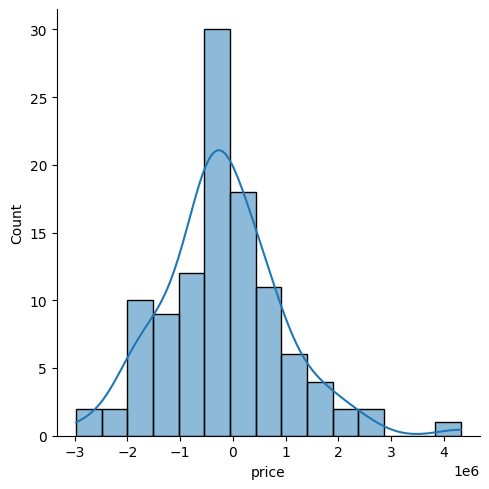

In [45]:
import seaborn as sns

sns.displot(diff, kde=True)  # Sama seperti histplot, menambahkan KDE jika diperlukan

In [46]:
import pickle

pickle.dump(lr, open('./model.sav', 'wb'))